In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

movies_full = pd.read_csv('data/imdb1000_data.csv')

# Dataset Description: IMDb Top 1000 Movies

This dataset contains information about the top 1000 movies rated on IMDb. Below is a description of each column:

| Column | Description |
|--------|-------------|
| **Poster_Link** | URL to the movie poster image on IMDb |
| **Series_Title** | Title of the movie |
| **Released_Year** | Year in which the movie was released |
| **Certificate** | Rating certificate (e.g., A, U, UA) |
| **Runtime** | Total runtime of the movie in minutes |
| **Genre** | Categories/genres the movie belongs to |
| **IMDB_Rating** | Movie rating on IMDb (scale of 1-10) |
| **Overview** | Brief summary or plot description of the movie |
| **Meta_score** | Score earned on Metacritic (scale of 1-100) |
| **Director** | Name of the movie's director |
| **Star1** | Name of the lead actor/actress |
| **Star2** | Name of the second lead actor/actress |
| **Star3** | Name of the third lead actor/actress |
| **Star4** | Name of the fourth lead actor/actress |
| **No_of_Votes** | Total number of votes received on IMDb |
| **Gross** | Box office earnings of the movie in dollars |

The dataset contains 1000 entries with 16 columns. Some columns like Certificate (10.1% missing) and Meta_score (15.7% missing) contain null values.

In [8]:
movies_full.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [9]:
movies = movies_full.drop(columns=['Poster_Link', 'Overview', 'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes'])
movies.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,"4,360,000"


In [10]:
movies.sort_values(by='Released_Year', ascending=False).head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Gross
966,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.6,77.0,Ron Howard,"173,837,933"
20,Soorarai Pottru,2020,U,153 min,Drama,8.6,NaN,Sudha Kongara,NaN
612,The Trial of the Chicago 7,2020,R,129 min,"Drama, History, Thriller",7.8,77.0,Aaron Sorkin,NaN
613,Druk,2020,NaN,117 min,"Comedy, Drama",7.8,81.0,Thomas Vinterberg,NaN
18,Hamilton,2020,PG-13,160 min,"Biography, Drama, History",8.6,90.0,Thomas Kail,NaN


In [57]:
meta_score = movies['Meta_score']
imdb_score = movies['IMDB_Rating'] * 10

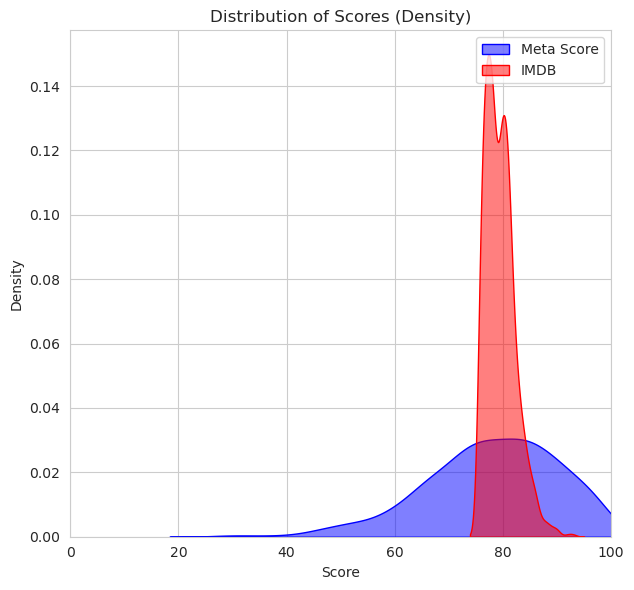

In [58]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
plt.subplot(1, 2, 2)

sns.kdeplot(meta_score, color="blue", fill=True, alpha=0.5, label="Meta Score")
sns.kdeplot(imdb_score, color="red", fill=True, alpha=0.5, label="IMDB")
plt.xlabel("Score")
plt.ylabel("Density")
plt.title("Distribution of Scores (Density)")
plt.legend()
plt.xlim(0, 100)

plt.tight_layout()
plt.show()